In [1]:
import pandas as pd

# Update the filename if needed
file_path = 'sentiment140.csv'  # Replace with the actual file name
df = pd.read_csv(file_path, encoding='latin1')

# Display basic information about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1599999 non-null  int64 
 1   1467810369                                                                                                           1599999 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1599999 non-null  object
 3   NO_QUERY                                                                                                             1599999 non-null  object
 4   _

In [2]:
# Rename columns
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Verify the changes
print(df.head())


   sentiment          id                          date     query  \
0          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   

            user                                               text  
0  scotthamilton  is upset that he can't update his Facebook by ...  
1       mattycus  @Kenichan I dived many times for the ball. Man...  
2        ElleCTF    my whole body feels itchy and like its on fire   
3         Karoli  @nationwideclass no, it's not behaving at all....  
4       joy_wolf                      @Kwesidei not the whole crew   


In [4]:
# Keep only the relevant columns
df = df[['sentiment', 'text']]

# Display the dataset
print(df.head())


   sentiment                                               text
0          0  is upset that he can't update his Facebook by ...
1          0  @Kenichan I dived many times for the ball. Man...
2          0    my whole body feels itchy and like its on fire 
3          0  @nationwideclass no, it's not behaving at all....
4          0                      @Kwesidei not the whole crew 


In [5]:
# Map sentiment labels
df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})

# Check the distribution of sentiments
print(df['sentiment'].value_counts())


sentiment
positive    800000
negative    799999
Name: count, dtype: int64


In [6]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)    # Remove mentions
    text = re.sub(r'#', '', text)       # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text) # Remove special characters
    text = text.lower()                 # Convert to lowercase
    return text

# Apply cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)

# Display cleaned data
print(df[['sentiment', 'cleaned_text']].head())


  sentiment                                       cleaned_text
0  negative  is upset that he cant update his facebook by t...
1  negative   i dived many times for the ball managed to sa...
2  negative    my whole body feels itchy and like its on fire 
3  negative   no its not behaving at all im mad why am i he...
4  negative                                not the whole crew 


In [7]:
df.to_csv('cleaned_sentiment_data.csv', index=False)


C:\Users\Pradeep\AppData\Local\Temp\ipykernel_15348\3429076795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


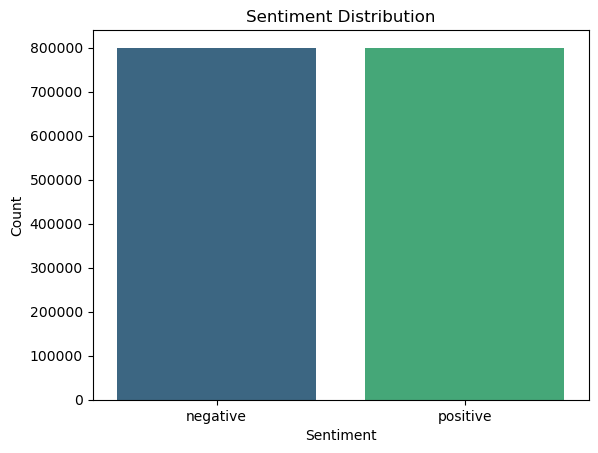

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


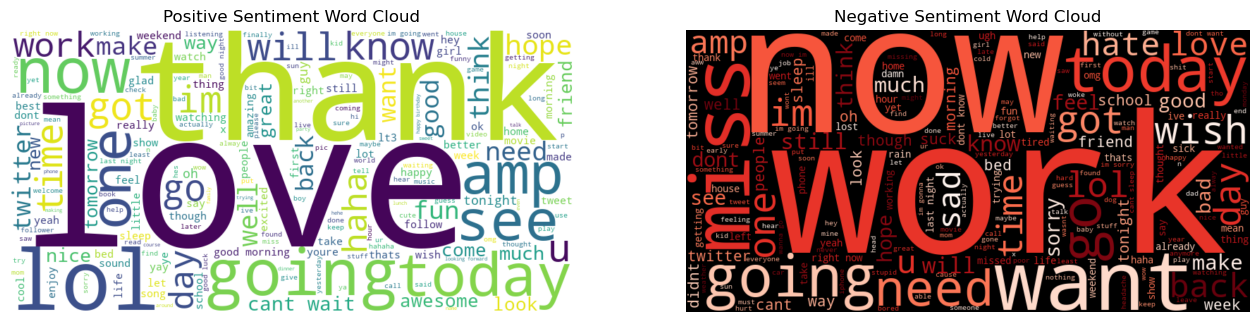

In [9]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiment
positive_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_text'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate word cloud for negative sentiment
negative_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_text'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Display the word clouds
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset (replace 'path_to_file.csv' with your file path)
df = pd.read_csv('cleaned_sentiment_data.csv', encoding='latin1', header=None)

# Step 2: Rename relevant columns for clarity
df.rename(columns={2: 'date', 0: 'sentiment', 5: 'text'}, inplace=True)

# Step 3: Convert 'date' column to datetime format with explicit format
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y', errors='coerce')

# Step 4: Extract month-year for trend analysis
df['month_year'] = df['date'].dt.to_period('M')

# Step 5: Map sentiment values to readable labels
df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})

# Step 6: Aggregate sentiment counts by month-year
sentiment_trends = df.groupby(['month_year', 'sentiment']).size().unstack()

# Step 7: Plot sentiment trends over time
sentiment_trends.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid()
plt.show()


TypeError: no numeric data to plot